# Visualize

データ解析を始めるとき、まずなにから始めるでしょうか。

それはデータセットの可視化です。理由は大きく2つあります。

1. 実際のデータ解析ではデータがとても汚い場合が多い

欠損値は当たり前、重複したレコードや、本来入っては行けない値(住所のカラムに電話番号が入っていたり)は頻発します。  
このようなデータを放置したまま機械学習を行っても高い精度はまず出せません。

2. データの分布を見なければ良い特徴量を作成できない。

多くの機械学習モデリングでは、特徴量とよばれるデータから目的の変数を説明できるであろう変数を作成する作業を行います。  
この時データの偏りを可視化するのはよい特徴を見つけるのに役立ちます。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
df_logs = pd.read_csv("../data/train/reading_logs.tsv", sep="\t")
df_books = pd.read_csv("../data/train/books.tsv", sep="\t")

df_logs.book_id = df_logs.book_id.astype("str")
df_books.id = df_books.id.astype("str")
df_books = df_books.rename(columns=dict(id="book_id"))

データフレームから行をサンプルしたい

In [3]:
df_logs.sample(10)

book_id   read_date  user_id
1400277    27918  2016/08/16     7875
620043    638418  2012/10/19    90927
333115    494064  2009/08/31    79049
1016303  9296066  2015/04/16    81271
1444992  7247945  2017/06/21   720147
1578006   472348  2014/03/16    97197
780148   5282740  2012/08/11    85641
416740    573950  2011/08/23    77785
44304    6458139  2013/06/28    85796
508236    450279  2010/11/03     6820

True, False の条件を返す式を渡すと、True となる行のみを取得することができます。

In [4]:
df_books[df_books["book_id"].astype("int") < 10]

book_id                    title  \
0       2        ビート・オブ・ハート (文春文庫)   
1       3                   不条理な殺人   
2       4      ダ・ヴィンチ・レガシー (集英社文庫)   
3       5                     アメリカ   
4       6  東日本と西日本―列島社会の多様な歴史世界 (…   
5       7         大魚の一撃 (扶桑社ミステリー)   
6       8  初恋アニヴァーサリー (講談社青い鳥文庫スペ…   

                                           author_id  
0  %E3%83%93%E3%83%AA%E3%83%BC+%E3%83%AC%E3%83%83...  
1  %E6%B3%95%E6%9C%88+%E7%B6%B8%E5%A4%AA%E9%83%8E...  
2  %E3%83%AB%E3%82%A4%E3%82%B9%E3%83%BB%E3%83%91%...  
3               %E8%97%A4%E5%8E%9F%E6%96%B0%E4%B9%9F  
4  %E5%A4%A7%E9%87%8E+%E6%99%8B%2C%E5%AE%AE%E6%9C...  
5  %E3%82%AB%E3%83%BC%E3%83%AB+%E3%83%8F%E3%82%A4...  
6  %E5%90%8D%E6%9C%A8%E7%94%B0+%E6%81%B5%E5%AD%90...

str アクセサを使うと Series の各レコードに対して、文字列としての制限をかけることができます。

ex. `吾輩は` という文字列をタイトルにもつ本の数

In [5]:
df_books.title.str.contains("吾輩は").sum()

41

複数の条件は and(`&`) や or(`|`) で結合できます

ex2). `ノルウェイの森` をタイトルに持ち, かつ10文字以上である本一覧

In [6]:
has_norway = df_books.title.str.contains("ノルウェイの森", na=False)
over_10 = df_books.title.str.len() > 10
df_books[has_norway & over_10]

book_id                    title  \
2213        5424           『ノルウェイの森』の村上春樹   
179950    570717       ノルウェイの森〈上〉 (講談社文庫)   
179951    570718       ノルウェイの森〈下〉 (講談社文庫)   
185066    576954        ノルウェイの森 上 (講談社文庫)   
185067    576956        ノルウェイの森 下 (講談社文庫)   
207558    706074  ノルウェイの森 文庫 全2巻 完結セット (…   
378210  10365904          ノルウェイの森　上・下巻セット   
430091  12684739  上・下2冊セット　ノルウェイの森　村上春樹　…   

                                    author_id  
2213    %E9%85%92%E4%BA%95+%E8%8B%B1%E8%A1%8C  
179950  %E6%9D%91%E4%B8%8A+%E6%98%A5%E6%A8%B9  
179951  %E6%9D%91%E4%B8%8A+%E6%98%A5%E6%A8%B9  
185066  %E6%9D%91%E4%B8%8A+%E6%98%A5%E6%A8%B9  
185067  %E6%9D%91%E4%B8%8A+%E6%98%A5%E6%A8%B9  
207558  %E6%9D%91%E4%B8%8A+%E6%98%A5%E6%A8%B9  
378210  %E6%9D%91%E4%B8%8A+%E6%98%A5%E6%A8%B9  
430091   %E6%9D%91%E4%B8%8A%E6%98%A5%E6%A8%B9

In [7]:
df_logs.read_date = pd.to_datetime(df_logs.read_date.replace("日付不明", np.NAN), errors="coerce")

In [8]:
len(df_logs)

1696149

## 基礎編

### 1.null のデータがいくつあるのか見たい

In [9]:
df_logs.isnull().sum()

book_id           0
read_date    248003
user_id           0
dtype: int64

### 2. 統計情報を見たい

In [10]:
df_logs.describe()

user_id
count  1.696149e+06
mean   2.697231e+05
std    3.135413e+05
min    9.000000e+00
25%    6.762400e+04
50%    8.441400e+04
75%    6.742030e+05
max    8.817590e+05

### 課題1

ユニークなユーザーの数を知りたい

In [11]:
len(df_logs["user_id"].unique())

5086

### 課題2

登場回数の多い本の上位 10 件を見たい

In [12]:
df_logs.book_id.value_counts().head(10)

624647      786
578893      739
581015      694
11104585    692
9743485     669
2985427     656
578162      642
579054      626
573811      618
580890      588
Name: book_id, dtype: int64

参考: SQL like にやると以下のようになります

In [13]:
df_count = df_logs.groupby("book_id", as_index=False)\
    .count()\
    .rename(columns=dict(user_id="count"))[["count", "book_id"]] \
    .sort_values("count", ascending=False)\
    .merge(df_books, on="book_id", how="left")
df_count.head(10)

count   book_id                    title  \
0    786    624647             阪急電車 (幻冬舎文庫)   
1    739    578893         夜は短し歩けよ乙女 (角川文庫)   
2    694    581015          西の魔女が死んだ (新潮文庫)   
3    692  11104585                   コンビニ人間   
4    669   9743485                君の膵臓をたべたい   
5    656   2985427  ビブリア古書堂の事件手帖―栞子さんと奇妙な客…   
6    642    578162  告白 (双葉文庫) (双葉文庫 み 21-1)   
7    626    579054           夜のピクニック (新潮文庫)   
8    618    573811       イニシエーション・ラブ (文春文庫)   
9    588    580890          レインツリーの国 (新潮文庫)   

                                        author_id  
0                    %E6%9C%89%E5%B7%9D+%E6%B5%A9  
1  %E6%A3%AE%E8%A6%8B+%E7%99%BB%E7%BE%8E%E5%BD%A6  
2           %E6%A2%A8%E6%9C%A8+%E9%A6%99%E6%AD%A9  
3  %E6%9D%91%E7%94%B0+%E6%B2%99%E8%80%B6%E9%A6%99  
4           %E4%BD%8F%E9%87%8E+%E3%82%88%E3%82%8B  
5                    %E4%B8%89%E4%B8%8A+%E5%BB%B6  
6           %E6%B9%8A+%E3%81%8B%E3%81%AA%E3%81%88  
7                    %E6%81%A9%E7%94%B0+%E9%99%B8  
8           %E4%B9%BE+%E3%81%8F%E3%82%8B%E3%81%BF  
9                    %E6%9C%89%E5%B7%9D+%E6%B5%A9

ついでにグラフにしてみましょう

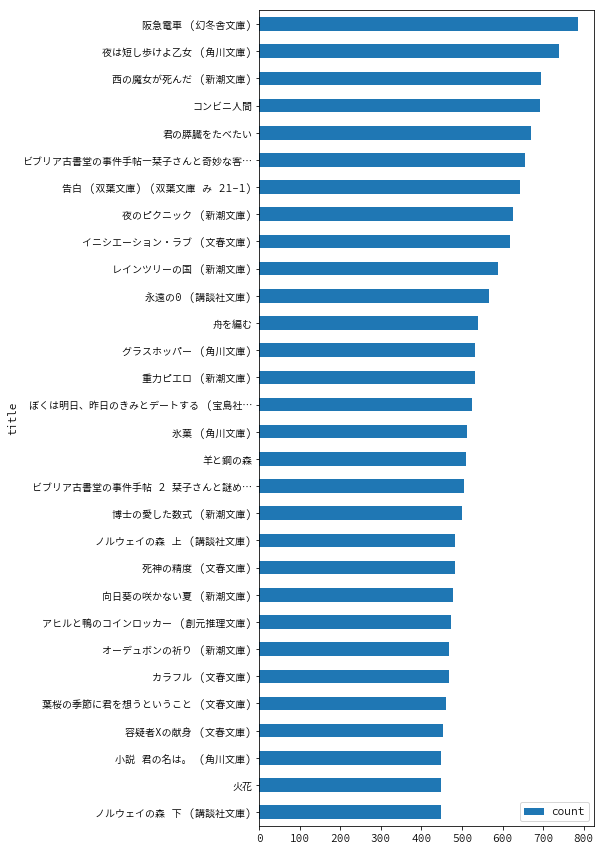

In [14]:
fig = plt.figure(figsize=(6, 15))
ax = fig.add_subplot(1, 1, 1)
df_count.head(30).iloc[::-1, :].set_index("title").plot(kind="barh", ax=ax)

### 課題3

ユーザーごとの読書数のヒストグラムを見たい

> ref: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

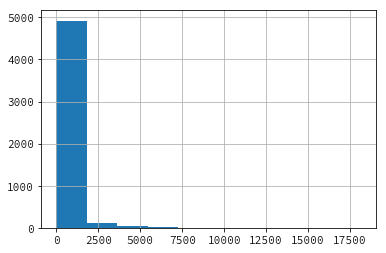

In [15]:
df_logs.groupby("user_id").count()["book_id"].hist()

* 数が少ない部分が潰れてしまっているので 0 ~ 5000 の間で等間隔に切ってみる
* 対数スケールにしてみる

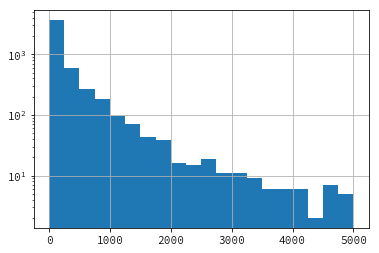

In [16]:
df_logs.groupby("user_id").count()["book_id"].hist(bins=np.linspace(0, 5000, 21), log=True)

## 時系列処理

今回のデータには `読書を記録した日` という情報が入っている。  
これを使って時系列データの可視化をやってみましょう

### 日時の定義

`pandas` には `pd.Timestamp` というクラスが用意されていて、日時を表すオブジェクトを作成することができます

In [17]:
now = pd.Timestamp.now()
after = pd.Timestamp(2014, 5, 1)

print(now)

print(after)

2018-06-21 17:15:19.533086
2014-05-01 00:00:00


### 課題4

今日から `2014-05-01` までの間の一ヶ月ごとの読書記録の数の推移を知りたい

ヒント

* pd.Groupter

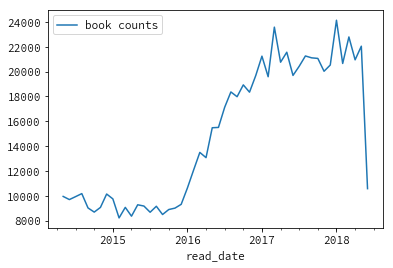

In [18]:
df_logs[(now > df_logs.read_date) & (df_logs.read_date > after)]\
  .set_index("read_date")[["book_id"]]\
  .groupby(pd.Grouper(freq='M'))\
  .count()\
  .rename(columns=dict(book_id="book counts"))\
  .plot()

### 課題5

2017年最も読まれた本の読書記録数の推移を知りたい

In [19]:
def index_in(year):
    return (df_logs.read_date > pd.Timestamp(year, 1, 1)) & (df_logs.read_date < pd.Timestamp(year, 12, 31))

In [20]:
idx = pd.date_range(start=pd.Timestamp(2015, 1, 1), end=pd.Timestamp.now(), freq="M")

> 時系列データで抜けた部分を 0 で埋めるにはどうすれば良い?  
> https://stackoverflow.com/questions/19324453/add-missing-dates-to-pandas-dataframe

In [21]:
df_top = df_logs[index_in(2017)].set_index("read_date")\
    .groupby("book_id")\
    .count()\
    .sort_values("user_id", ascending=False)\
    .head(1)\
    .merge(df_books, on="book_id", how="left")

df_count = df_logs.set_index("read_date")\
    .groupby(["book_id", pd.Grouper(freq="M")])\
    .count()\
    .rename(columns=dict(user_id="count"))

Text(0.5,1,'蜜蜂と遠雷')

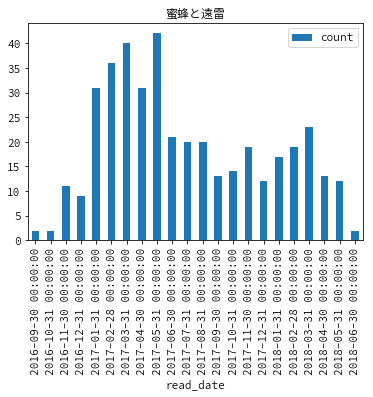

In [22]:
ax = df_count.loc[df_top.book_id.values[0]].plot(kind="bar")
ax.set_title(df_top.title.values[0])

## Additional

2015年から2018年の間で、その年ごとにもっとも読まれた本を一枚のグラフに時系列で描写したい

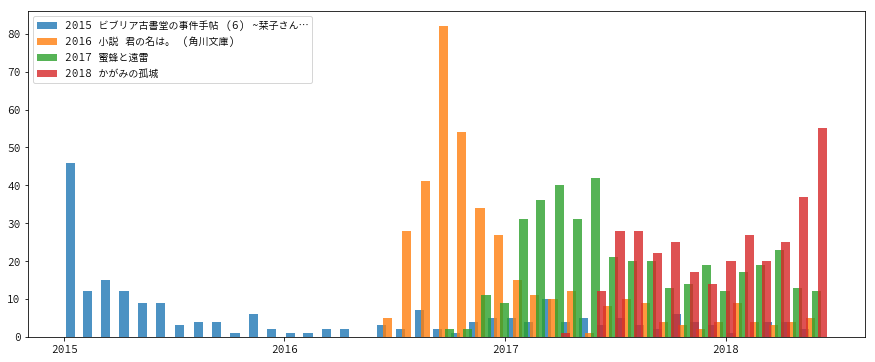

In [23]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)

for i, y in enumerate([2015, 2016, 2017, 2018]):
    df_top = df_logs[index_in(y)].set_index("read_date")\
        .groupby("book_id")\
        .count()\
        .sort_values("user_id", ascending=False)\
        .head(1)\
        .merge(df_books, on="book_id", how="left")

    _df = df_count.loc[df_top.book_id.values[0]]\
        .reindex(idx, fill_value=0)

    ax.bar(_df.index + pd.Timedelta((i - 2) * 10, unit="d"), 
           _df["count"].values, 
           15., 
           label=str(y) + " " + df_top.title.values[0], alpha=.8)

# 1: 右上 から 4 まで半時計回りに動く
# 2 は左上
ax.legend(loc=2)

# x 軸の表示を年だけにする
ax.xaxis.set_major_locator(mdates.YearLocator())